# Flux Vision Data (Zone)

In [261]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import seaborn as sns
# sns.set()
sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True, rc=None)
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gpl
import json
import mapclassify
import matplotlib.ticker as ticker

%matplotlib inline

In [137]:
# read csv file

# pd.read_csv('../../data/export_csv/Flux_24h')
df = pd.read_csv('../../data/export_csv/Flux_24h.csv',sep = ';')
# df = df.groupby(by=['Date','Origin','Destination'], as_index=0).sum()

# Date Conversion
df['Date'] = pd.to_datetime(df['Date'])
df['Date_day'] = df['Date'].dt.weekday

df

Date Origin Destination Immobility              Home_Category  \
0        2020-01-31    Aba     Gombari         1h           Outside_Resident   
1        2020-01-31    Aba     Gombari         1h       Origin_Zone_Resident   
2        2020-01-31    Aba     Gombari         3h  Destination_Zone_Resident   
3        2020-01-31    Aba     Gombari         3h       Origin_Zone_Resident   
4        2020-01-31    Aba       Watsa         1h  Destination_Zone_Resident   
...             ...    ...         ...        ...                        ...   
14351034 2020-06-29  Zongo     Tandala         1h       Origin_Zone_Resident   
14351035 2020-06-29  Zongo     Tandala         3h           Outside_Resident   
14351036 2020-06-29  Zongo     Tandala         3h           Outside_Resident   
14351037 2020-06-29  Zongo     Tandala         3h           Outside_Resident   
14351038 2020-06-29  Zongo     Tandala         3h       Origin_Zone_Resident   

                Activity_Category Observation_Zone       Mode  Volume  \
0                  Outside_Worker      ZoneGlobale  All_modes     264   
1              Origin_Zone_Worker      ZoneGlobale  All_modes     132   
2         Destination_Zone_Worker      ZoneGlobale  All_modes     131   
3              Origin_Zone_Worker      ZoneGlobale  All_modes     263   
4              Origin_Zone_Worker      ZoneGlobale  All_modes     132   
...                           ...              ...        ...     ...   
14351034       Origin_Zone_Worker      ZoneGlobale  All_modes    2128   
14351035           Outside_Worker      ZoneGlobale  All_modes    6380   
14351036  Destination_Zone_Worker      ZoneGlobale  All_modes     691   
14351037       Origin_Zone_Worker      ZoneGlobale  All_modes    1382   
14351038       Origin_Zone_Worker      ZoneGlobale  All_modes    1406   

          Date_day  
0                4  
1                4  
2                4  
3                4  
4                4  
...            ...  
14351034         0  
14351035         0  
14351036         0  
14351037         0  
14351038         0  

[14351039 rows x 10 columns]

In [138]:
list((df.groupby(by = 'Observation_Zone').groups.keys()))

['Al Dar',
 'Ambassade Afrique du Sud',
 'Arret Bakayaou',
 'Arret Camp Babylone',
 'Arret Centre hospitalier de Kintambo',
 'Arret Sakombi',
 'Arret Socimat',
 'Arret Stade velodrome',
 'Arret Station Centre Superieur',
 'Arret Station Macampagne (ML)',
 'Arret Telecel Alingwa',
 'Arret Utex Africa',
 'Arret Utex Africa 2',
 'Arret hôtel du Gouvernement',
 'Arret marylene',
 'Arret moulard',
 'Avenue Kimbondo et Pierre Mulele',
 'Avenue du Commerce et Kasa vubu',
 'Avenue kalembelembe et Pierre Mulele (ASSANEF)',
 'BAYAKA',
 'Bar et Flat ABC',
 'Baruti Tabernacle',
 'Beach Ngobila',
 'Benseke Nouvelle Cité',
 'Bienvenue',
 'Binza Arret Maternite',
 'Bon Marché',
 'Brussels airlines Check in',
 'CHK',
 'CREFM Eglise La Compassion',
 'Café Muzik',
 'Carrigres',
 'Centre Evangélique Emmanuel Langa-langa',
 'Centre Evangélique LA TRINITE',
 'Centre Evangélique la Résurrection',
 'Centre Missionnaire Evangélique au Congo',
 'Centre Monkole',
 'Centre Vijana',
 "Centre d'Evangelisation Peni

## Checking for null and missing values

In [139]:
df[(df.Volume.isnull())|(df.Volume.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [140]:
df[(df.Date.isnull())|(df.Date.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [141]:
df[(df.Origin.isnull())|(df.Origin.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [142]:
df[(df.Destination.isnull())|(df.Destination.isna())]

Empty DataFrame
Columns: [Date, Origin, Destination, Immobility, Home_Category, Activity_Category, Observation_Zone, Mode, Volume, Date_day]
Index: []

In [143]:
df.describe()

Volume      Date_day
count  1.435104e+07  1.435104e+07
mean   4.382257e+02  2.937881e+00
std    3.694183e+03  1.986296e+00
min    2.100000e+01  0.000000e+00
25%    3.400000e+01  1.000000e+00
50%    6.500000e+01  3.000000e+00
75%    2.050000e+02  5.000000e+00
max    6.291550e+05  6.000000e+00

In [244]:
df_g = df[df.Observation_Zone == 'ZoneGlobale'].groupby(by=['Date','Origin','Destination','Observation_Zone','Date_day'], as_index=0).sum()
df_g

Date     Origin Destination Observation_Zone  Date_day  Volume
0      2020-01-31        Aba     Gombari      ZoneGlobale         4     790
1      2020-01-31        Aba       Watsa      ZoneGlobale         4     132
2      2020-01-31        Adi     Ariwara      ZoneGlobale         4     131
3      2020-01-31  Alimbongo       Kayna      ZoneGlobale         4     462
4      2020-01-31  Alimbongo    Kibirizi      ZoneGlobale         4      51
...           ...        ...         ...              ...       ...     ...
488176 2020-06-29    Yangala       Luiza      ZoneGlobale         0     400
488177 2020-06-29    Yangala      Luputa      ZoneGlobale         0     259
488178 2020-06-29    Yangala     Masuika      ZoneGlobale         0    7371
488179 2020-06-29    Yangala  Mwene Ditu      ZoneGlobale         0   41196
488180 2020-06-29      Zongo     Tandala      ZoneGlobale         0   16147

[488181 rows x 6 columns]

## Total flux visualization

In [147]:
df_total_flux = df_g.groupby(by=['Date',], as_index=0).sum()

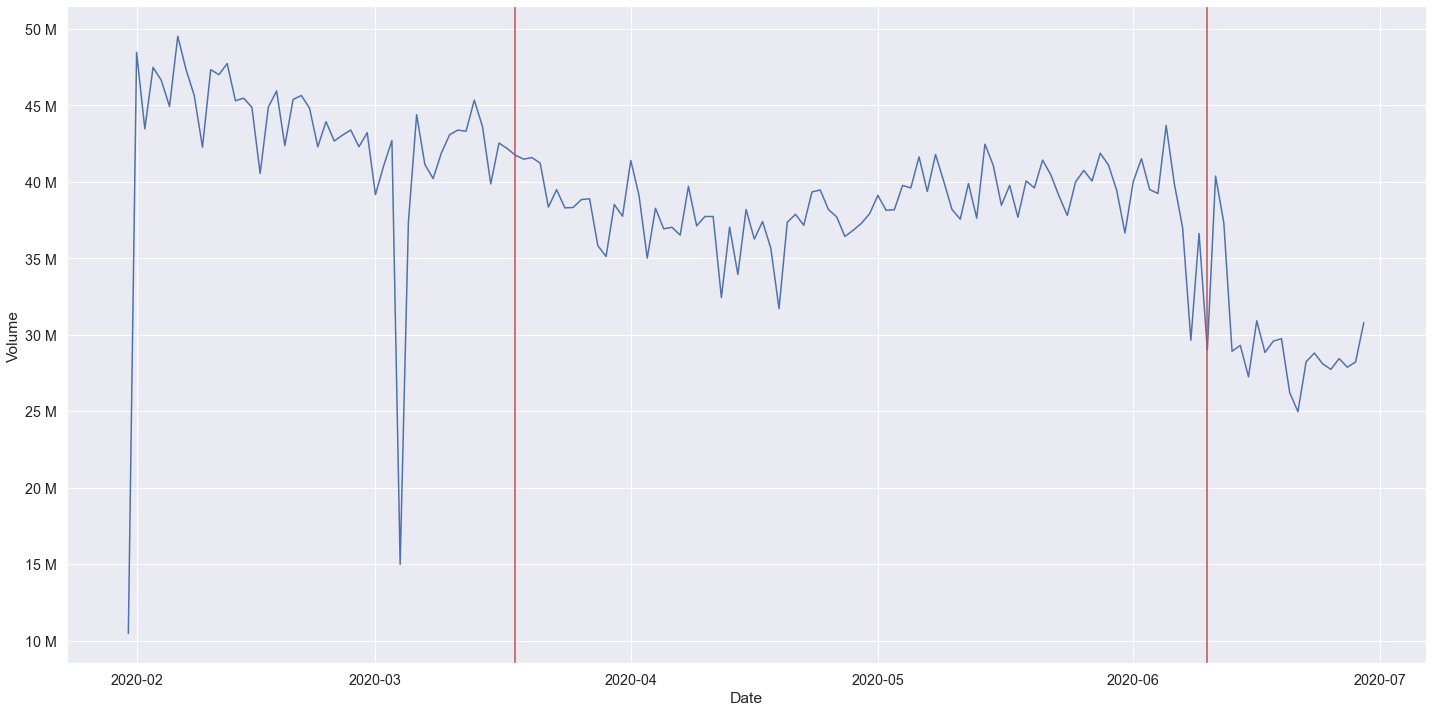

In [148]:
fig = plt.figure(figsize=(20,10))
ax = sns.lineplot(x='Date',y='Volume',data=df_total_flux)

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

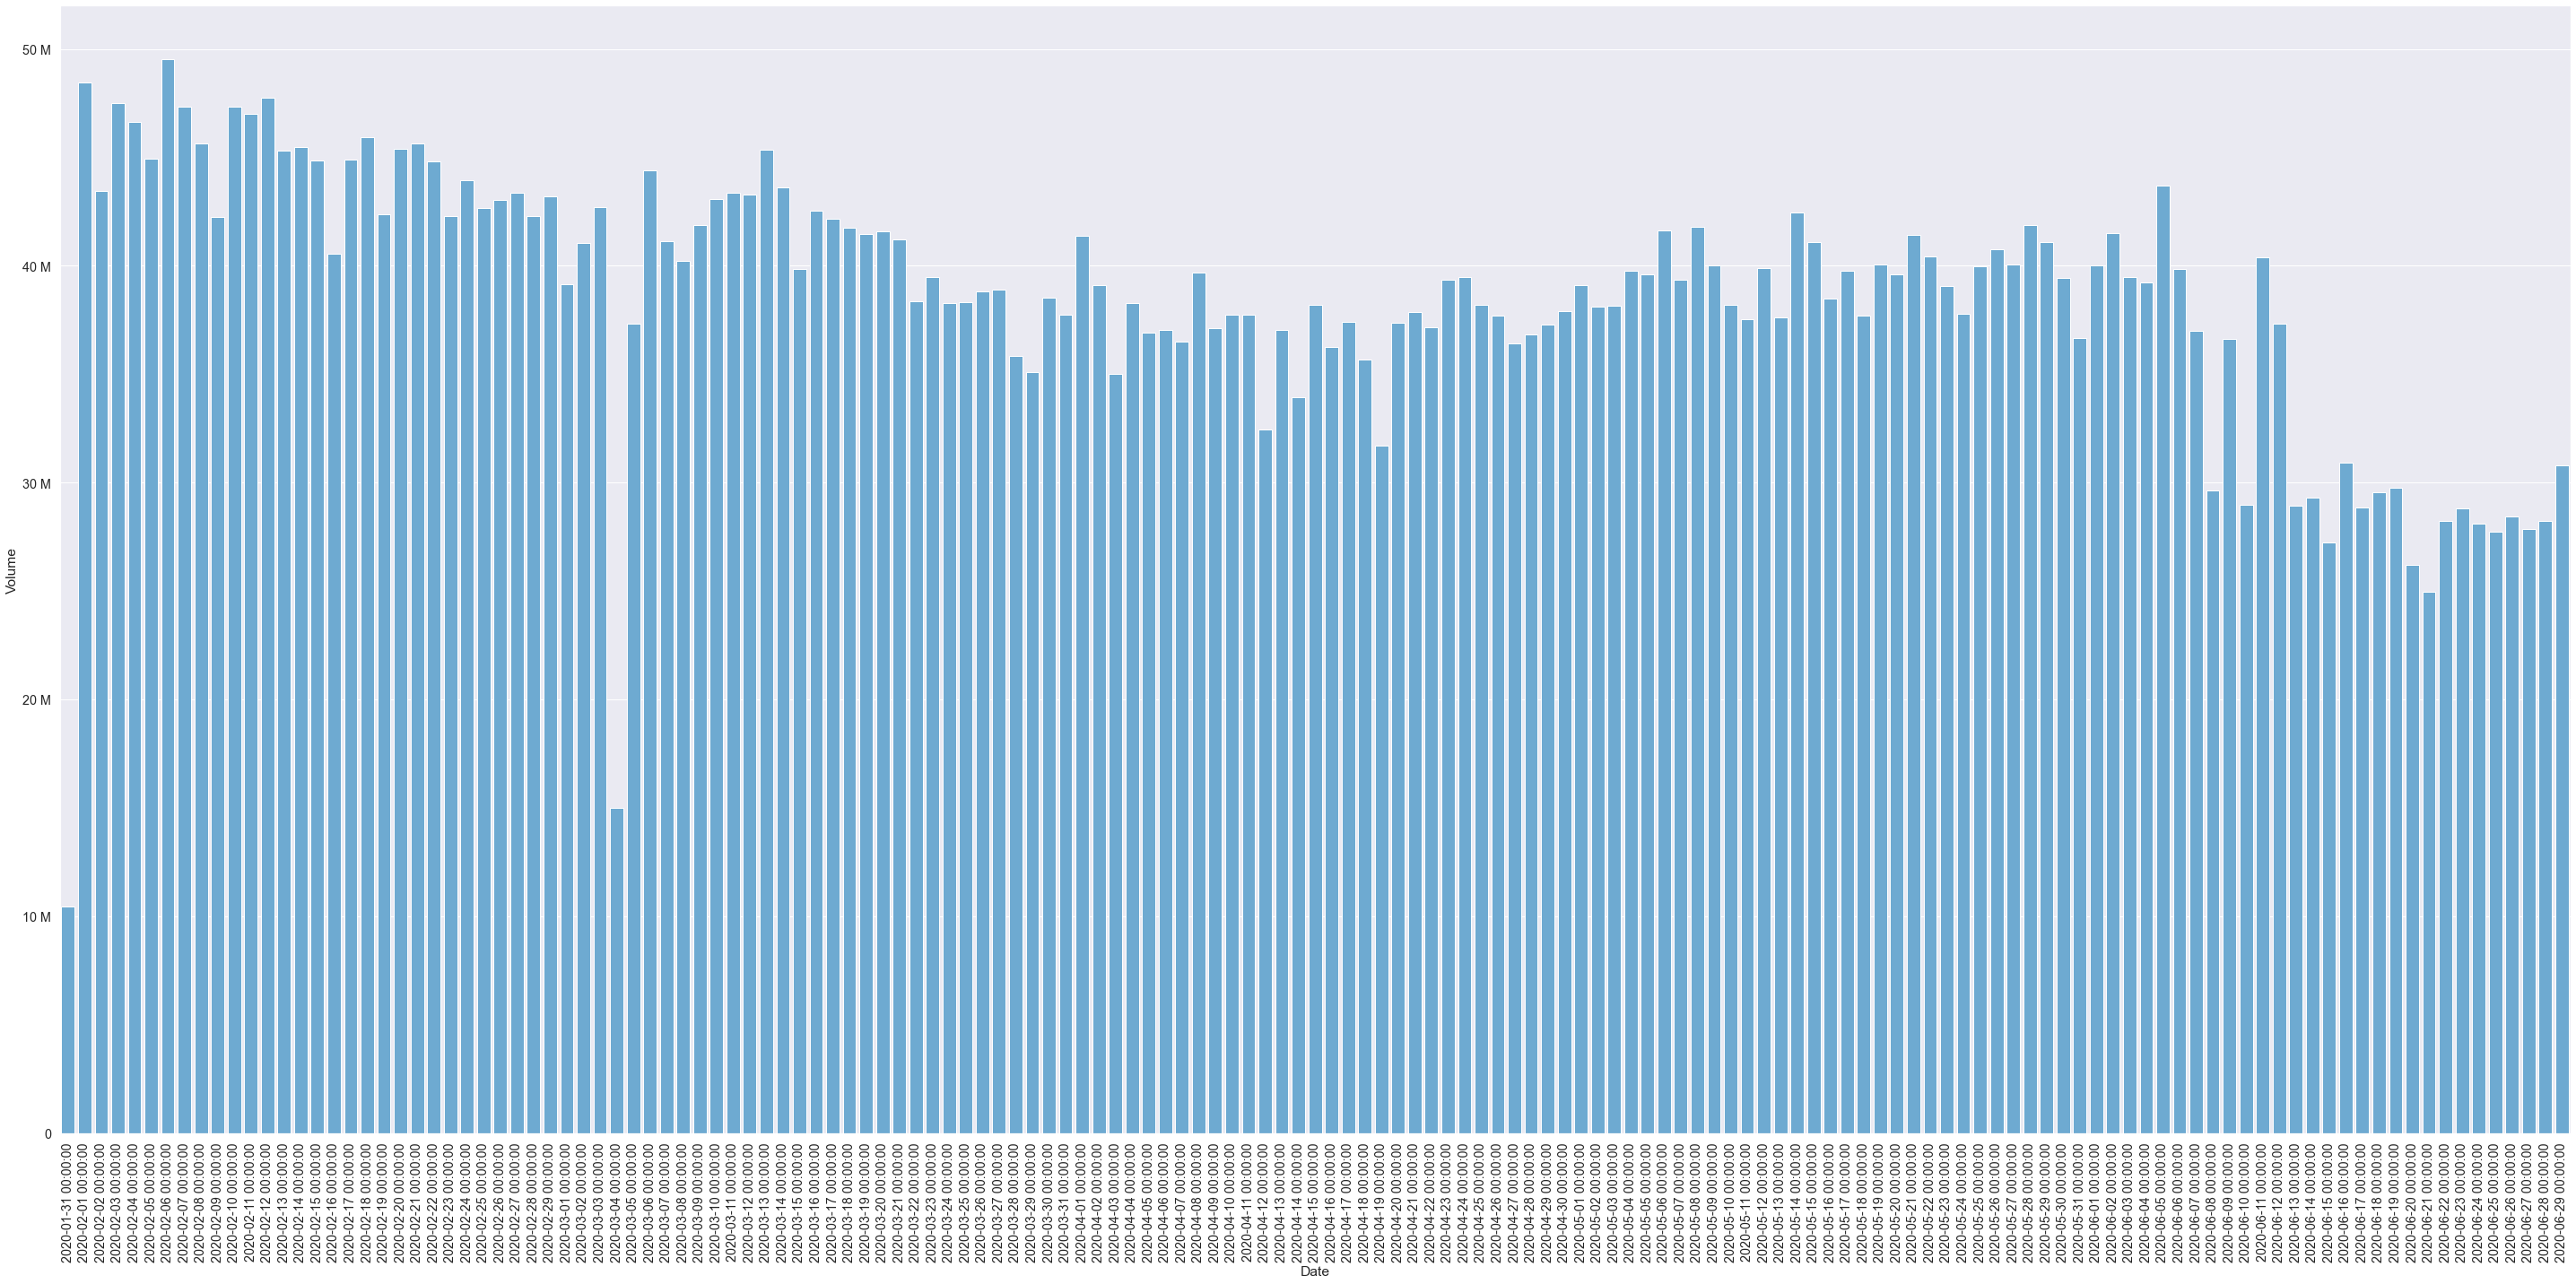

In [215]:
fig = plt.figure(figsize=(40,20))

ax = sns.barplot(x='Date',y='Volume',data=df_total_flux,palette=['#5DADE2'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

In [150]:
#read Geo Data
# ./data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp
zone_gd =gpd.read_file('../../data/GEO DRC/RDC_Micro_ZonesDeSante_Regroupees.shp')
zone_gd

Index        C0        C1   Surface     PROVINCE Zone+Peupl  \
0      231  0.357866  0.014489  33881.01   Sud-Ubangi    Tandala   
1      230  0.386971  0.023376    762.28   Sud-Ubangi      Zongo   
2      363  0.482317  0.117910  12679.67  Nord-Ubangi       Bili   
3      233  0.624055  0.264078   1251.62  Nord-Ubangi  Gbadolite   
4      159  0.329985  0.008398  21860.94  Nord-Ubangi       Loko   
..     ...       ...       ...       ...          ...        ...   
310    336  0.360842  0.124134   5558.60        Ituri        Aru   
311    340  0.647995  0.181076   1153.12        Ituri        Adi   
312    338  0.715352  0.264651   3159.19        Ituri    Ariwara   
313    335  0.471356  0.116512  12960.34    Haut-Uele        Aba   
314    346  0.492376  0.096703  19432.93    Haut-Uele      Dungu   

                                              geometry  
0    POLYGON ((18.68941 1.90628, 18.68649 1.90233, ...  
1    POLYGON ((18.67816 3.97665, 18.66909 3.96872, ...  
2    POLYGON ((19.42578 3.89935, 19.41802 3.89628, ...  
3    POLYGON ((20.86461 4.06245, 20.86071 4.06242, ...  
4    POLYGON ((21.35464 3.39852, 21.35367 3.39739, ...  
..                                                 ...  
310  POLYGON ((30.65123 2.14049, 30.65002 2.13740, ...  
311  POLYGON ((30.78577 3.29087, 30.77890 3.29006, ...  
312  POLYGON ((30.45461 2.91338, 30.43551 2.91118, ...  
313  POLYGON ((30.20675 2.59240, 30.18471 2.58432, ...  
314  POLYGON ((28.56956 2.81148, 28.56590 2.80066, ...  

[315 rows x 7 columns]

In [151]:
zone_filtered_gd = zone_gd[zone_gd['PROVINCE'] == 'Kinshasa']
zone_filtered_gd

Index        C0        C1  Surface  PROVINCE       Zone+Peupl  \
44    150  0.696706  0.227939   129.83  Kinshasa  Mont Ngafula II   
49    152  0.743083  0.375349   828.67  Kinshasa            Nsele   
50    126  0.634018  0.415307   403.16  Kinshasa   Mont Ngafula I   
51    147  0.679085  0.303660    48.15  Kinshasa      Binza Meteo   
52    139  0.545393  0.270582     5.18  Kinshasa           Makala   
53    142  0.642833  0.316181    20.24  Kinshasa         Selembao   
54    131  0.501886  0.284796    15.67  Kinshasa          Kisenso   
55    129  0.717995  0.317754    16.66  Kinshasa            Lemba   
56    130  0.631862  0.374906     4.74  Kinshasa           Matete   
57    125  0.626042  0.304076     9.09  Kinshasa           Ndjili   
58    155  0.559614  0.328054    27.30  Kinshasa       Kimbanseke   
59    127  0.530997  0.391604   238.15  Kinshasa           Kikimi   
60    473  0.634172  0.229627    33.70  Kinshasa        Masina II   
61    143  0.604435  0.322328    14.55  Kinshasa         Masina I   
62    369  0.701169  0.348933    17.39  Kinshasa         Kingabwa   
63    137  0.670063  0.265780     3.53  Kinshasa         Kalamu I   
64    135  0.757594  0.234495    12.47  Kinshasa           Limete   
65    133  0.658129  0.237416     4.24  Kinshasa          Barumbu   
66    134  0.647459  0.277446     3.02  Kinshasa         Kinshasa   
67    136  0.733176  0.306315     2.47  Kinshasa        Kalamu II   
68    145  0.642602  0.208008     3.81  Kinshasa        Kasa-Vubu   
69    132  0.621335  0.199109     2.72  Kinshasa           Police   
70    467  0.739564  0.189460    12.73  Kinshasa            Gombe   
71    175  0.654248  0.318059     7.20  Kinshasa           Kokolo   
72    146  0.645281  0.340095     3.04  Kinshasa      Ngiri-Ngiri   
73    138  0.607124  0.319825     4.37  Kinshasa            Bumbu   
74    144  0.552859  0.275995     4.01  Kinshasa         Kintambo   
75    148  0.813409  0.234393    21.16  Kinshasa      Binza Ozone   
76    352  0.610482  0.067564  8793.41  Kinshasa         Maluku I   

                                             geometry  
44  POLYGON ((15.17375 -4.52650, 15.17299 -4.52693...  
49  POLYGON ((15.59596 -4.60264, 15.58248 -4.60648...  
50  POLYGON ((15.34778 -4.64765, 15.34653 -4.64782...  
51  POLYGON ((15.25526 -4.44355, 15.25471 -4.44424...  
52  POLYGON ((15.29708 -4.40185, 15.29672 -4.40227...  
53  POLYGON ((15.25947 -4.44261, 15.25873 -4.44266...  
54  POLYGON ((15.35963 -4.44029, 15.35962 -4.44033...  
55  POLYGON ((15.30841 -4.43843, 15.30785 -4.43851...  
56  POLYGON ((15.35452 -4.39658, 15.34441 -4.39741...  
57  POLYGON ((15.37657 -4.42529, 15.37592 -4.42557...  
58  POLYGON ((15.35618 -4.48471, 15.35581 -4.48498...  
59  POLYGON ((15.48592 -4.60814, 15.48425 -4.60840...  
60  POLYGON ((15.40116 -4.40045, 15.40124 -4.40103...  
61  POLYGON ((15.41898 -4.40593, 15.41865 -4.40595...  
62  POLYGON ((15.36685 -4.38685, 15.36667 -4.38714...  
63  POLYGON ((15.32036 -4.36840, 15.31993 -4.36965...  
64  POLYGON ((15.35280 -4.38173, 15.35284 -4.38233...  
65  POLYGON ((15.32380 -4.33240, 15.32322 -4.33250...  
66  POLYGON ((15.30674 -4.33390, 15.30641 -4.33400...  
67  POLYGON ((15.32493 -4.35090, 15.32491 -4.35109...  
68  POLYGON ((15.30670 -4.35260, 15.30656 -4.35261...  
69  POLYGON ((15.29755 -4.33710, 15.29637 -4.33729...  
70  POLYGON ((15.29474 -4.32795, 15.29440 -4.32796...  
71  POLYGON ((15.28769 -4.35991, 15.28759 -4.36026...  
72  POLYGON ((15.30546 -4.36570, 15.30546 -4.36570...  
73  POLYGON ((15.30131 -4.38390, 15.30120 -4.38435...  
74  POLYGON ((15.27962 -4.35860, 15.27946 -4.35948...  
75  POLYGON ((15.24214 -4.36905, 15.24114 -4.37049...  
76  POLYGON ((15.83177 -5.02521, 15.83079 -5.02540...

In [372]:
list_filtered_zones = list(zone_filtered_gd['Zone+Peupl'])
print(list_filtered_zones,'size:',len(list_filtered_zones))

['Mont Ngafula II', 'Nsele', 'Mont Ngafula I', 'Binza Meteo', 'Makala', 'Selembao', 'Kisenso', 'Lemba', 'Matete', 'Ndjili', 'Kimbanseke', 'Kikimi', 'Masina II', 'Masina I', 'Kingabwa', 'Kalamu I', 'Limete', 'Barumbu', 'Kinshasa', 'Kalamu II', 'Kasa-Vubu', 'Police', 'Gombe', 'Kokolo', 'Ngiri-Ngiri', 'Bumbu', 'Kintambo', 'Binza Ozone', 'Maluku I'] size: 29


# Net Mobility

In [467]:
df_filtered_both = df_g[(df_g['Origin'].isin(list_filtered_zones)) | (df_g['Destination'].isin(list_filtered_zones))]
df_filtered_both

Date     Origin  Destination Observation_Zone  Date_day  Volume
19     2020-01-31    Barumbu  Binza Meteo      ZoneGlobale         4    1958
20     2020-01-31    Barumbu  Binza Ozone      ZoneGlobale         4    1819
21     2020-01-31    Barumbu         Boko      ZoneGlobale         4     382
22     2020-01-31    Barumbu        Bumbu      ZoneGlobale         4    1067
23     2020-01-31    Barumbu        Gombe      ZoneGlobale         4    7491
...           ...        ...          ...              ...       ...     ...
488007 2020-06-29  Sona-Bata     Selembao      ZoneGlobale         0    3102
488010 2020-06-29    Tandala        Nsele      ZoneGlobale         0     691
488098 2020-06-29      Vanga   Kimbanseke      ZoneGlobale         0     586
488099 2020-06-29      Vanga     Kingabwa      ZoneGlobale         0     584
488100 2020-06-29      Vanga     Masina I      ZoneGlobale         0     620

[170613 rows x 6 columns]

### Daily Movement Flow

In [476]:
df_temp = df_filtered_both.groupby(by=['Date','Date_day'],as_index=0).sum()
df_temp.to_clipboard(True)

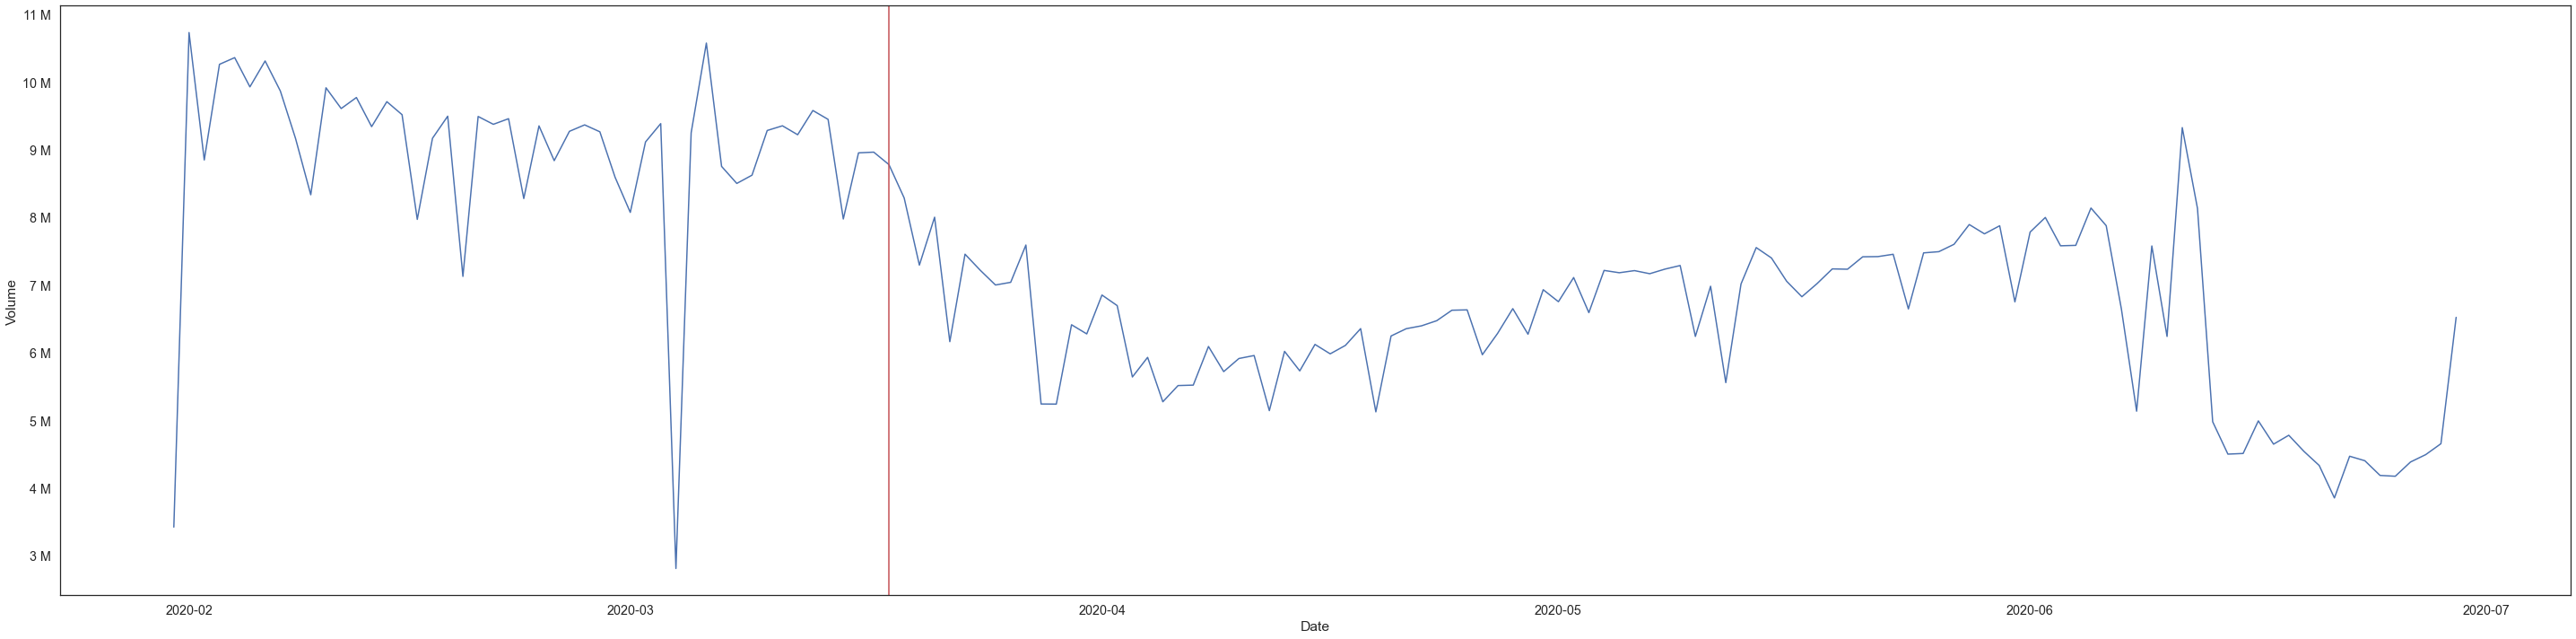

In [469]:
fig = plt.figure(figsize=(40,10))


ax = sns.lineplot(x='Date',y='Volume',data=df_temp,palette=['#000'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

# ax.set_xticklabels(labels = df_temp_gombe['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

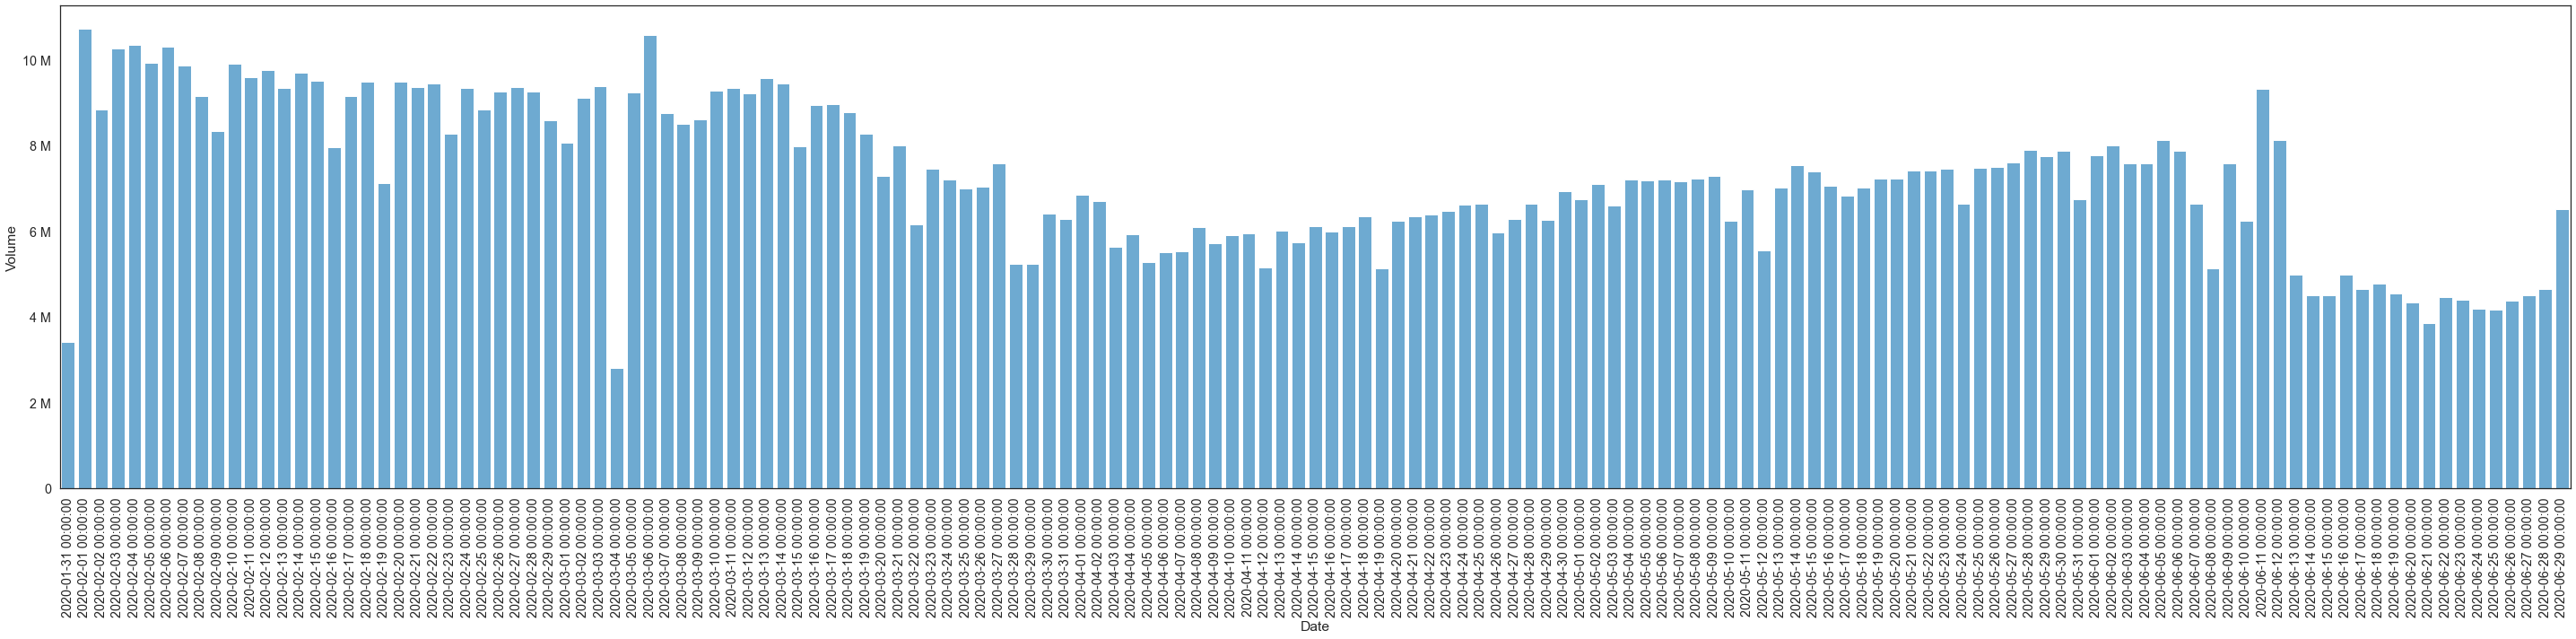

In [470]:
fig = plt.figure(figsize=(40,10))


ax = sns.barplot(x='Date',y='Volume',data=df_temp,palette=['#5DADE2'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set_xticklabels(labels = df_temp_gombe['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

### Net Mobility Variation( Overall)

In [471]:
df_agg_gen_mob = df_filtered_both.groupby(by=['Date','Date_day'],as_index=0).sum()

In [472]:
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df_agg_gen_mob['Date'] >= ref_start_date) & (df_agg_gen_mob['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (df_agg_gen_mob['Date'] >= obs_start_date) & (df_agg_gen_mob['Date'] <= obs_end_date)

df_ref_gen = df_agg_gen_mob.loc[mask_base]
df_obs_gen = df_agg_gen_mob.loc[mask_obs]

In [473]:
diff_mob_gen = df_obs_gen['Volume'].median() - df_ref_gen['Volume'].median()
delta_mob_gen = diff_mob_gen/df_ref_gen['Volume'].median()*100
diff_mob_gen,delta_mob_gen

(-2655255.0, -28.60763064081834)

### Net Mobility Variation By Zone

In [474]:
df_filtered_agg_in = df_filtered_both.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
#df_filtered_agg_in[(df_filtered_agg_in.Destination == 'Gombe') & (df_filtered_agg_in.Date == '2020-02-02')]

In [475]:
df_filtered_agg_out = df_filtered_both.groupby(by=['Date','Origin','Date_day'],as_index=0).sum()
#df_filtered_agg_out

In [443]:
df_filtered_agg_in_out = pd.merge(df_filtered_agg_in,df_filtered_agg_out, left_on=['Date','Destination','Date_day'], right_on=['Date','Origin','Date_day'])
df_filtered_agg_in_out

Date  Destination  Date_day  Volume_x       Origin  Volume_y
0    2020-01-31      Barumbu         4     82376      Barumbu     92444
1    2020-01-31  Binza Meteo         4    233696  Binza Meteo    232998
2    2020-01-31  Binza Ozone         4    118536  Binza Ozone     93816
3    2020-01-31         Boko         4      1224         Boko      1263
4    2020-01-31  Boko-Kivulu         4       798  Boko-Kivulu       533
...         ...          ...       ...       ...          ...       ...
7353 2020-06-29       Police         0    113484       Police     89243
7354 2020-06-29     Selembao         0    237897     Selembao    243829
7355 2020-06-29    Sona-Bata         0     16198    Sona-Bata     23516
7356 2020-06-29      Tandala         0       371      Tandala       691
7357 2020-06-29        Vanga         0        34        Vanga      1790

[7358 rows x 6 columns]

In [444]:
#df_filtered_both.groupby(by=['Date'],as_index=0).sum()

In [446]:
#Sum volume inbound and outbound for each zone
df_filtered_agg_in_out['Volume_x_plus_y'] = df_filtered_agg_in_out['Volume_x'] + df_filtered_agg_in_out['Volume_y']

In [447]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df_filtered_agg_in_out['Date'] >= ref_start_date) & (df_filtered_agg_in_out['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (df_filtered_agg_in_out['Date'] >= obs_start_date) & (df_filtered_agg_in_out['Date'] <= obs_end_date)

df_ref = df_filtered_agg_in_out.loc[mask_base]
df_obs = df_filtered_agg_in_out.loc[mask_obs]

In [449]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()
df_obs_agg = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination'],as_index=0).median()

In [450]:
df_ref_agg

Destination  Date_day  Volume_x  Volume_y  Volume_x_plus_y
0        Banalia       5.0     406.0     260.0            666.0
1        Barumbu       3.0  250729.0  257008.0         506561.0
2           Beni       4.0      75.0      50.0            142.0
3        Bibanga       1.5      83.5      56.5            124.5
4         Bikoro       3.0    1238.0     706.0           2048.0
..           ...       ...       ...       ...              ...
98   Tshamilemba       3.0     205.0     382.5            624.5
99      Tshikapa       3.0     298.0     303.0            601.0
100    Tshilenge       4.0      28.0      50.0             78.0
101        Vanga       3.0    1472.0    1436.0           3142.0
102      Wangata       3.5    1142.0     486.0           1982.0

[103 rows x 5 columns]

In [451]:
df_obs_agg

Destination  Date_day  Volume_x  Volume_y  Volume_x_plus_y
0       Barumbu       3.0  163850.0  164478.0         327693.0
1        Bikoro       3.0     497.0     871.0           1640.0
2   Binza Meteo       3.0  480751.0  473764.0         954515.0
3   Binza Ozone       3.0  210009.0  199862.0         409835.0
4        Boende       3.0    1515.0     379.0           1894.0
..          ...       ...       ...       ...              ...
80  Tshamilemba       3.0     218.0      78.0            347.0
81     Tshikapa       1.0     289.0     366.0            750.0
82        Vanga       3.0     440.0    1027.5           1719.0
83      Wangata       3.0     256.5     614.5           1151.0
84        Zongo       0.5      92.5      87.0            179.5

[85 rows x 5 columns]

In [452]:
df_obs_agg_merge = pd.merge(df_ref_agg, df_obs_agg,left_on='Destination', right_on='Destination')
df_obs_agg_merge['diffVolume_x_plus_y_x_y'] = df_obs_agg_merge['Volume_x_plus_y_y'] - df_obs_agg_merge['Volume_x_plus_y_x']

df_obs_agg_merge['deltaVolume_x_plus_y_x_y'] = df_obs_agg_merge['diffVolume_x_plus_y_x_y']/df_obs_agg_merge['Volume_x_plus_y_x']*100
df_obs_agg_merge = df_obs_agg_merge.sort_values('deltaVolume_x_plus_y_x_y')
df_obs_agg_merge = df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_filtered_zones)]

In [482]:
df_obs_agg_merge[['Destination','deltaVolume_x_plus_y_x_y']].to_clipboard(True)

In [478]:
df_obs_agg_merge.head(5)[['Destination','deltaVolume_x_plus_y_x_y']].to_clipboard(True)
df_obs_agg_merge.head(5)

Destination  Date_day_x  Volume_x_x  Volume_y_x  Volume_x_plus_y_x  \
17       Gombe         3.0    664086.0    744656.0          1414111.0   
48    Maluku I         3.0     82860.0     87154.0           167616.0   
65      Police         3.0    181575.0    180757.0           361943.0   
35    Kinshasa         3.0    296661.0    304776.0           604243.0   
0      Barumbu         3.0    250729.0    257008.0           506561.0   

    Date_day_y  Volume_x_y  Volume_y_y  Volume_x_plus_y_y  \
17         3.0    160201.0    167828.0           324096.0   
48         3.0     45035.0     47546.0            93328.0   
65         3.0    105530.0    104463.0           209806.0   
35         3.0    181251.0    181040.0           363269.0   
0          3.0    163850.0    164478.0           327693.0   

    diffVolume_x_plus_y_x_y  deltaVolume_x_plus_y_x_y  
17               -1090015.0                -77.081290  
48                 -74288.0                -44.320351  
65                -152137.0                -42.033414  
35                -240974.0                -39.880313  
0                 -178868.0                -35.310259

In [479]:
df_obs_agg_merge.tail(5)[['Destination','deltaVolume_x_plus_y_x_y']].to_clipboard(True)
df_obs_agg_merge.tail(5)

Destination  Date_day_x  Volume_x_x  Volume_y_x  Volume_x_plus_y_x  \
31       Kimbanseke         3.0    459924.0    430136.0           887213.0   
57  Mont Ngafula II         3.0    275033.0    258839.0           530661.0   
13            Bumbu         3.0    310852.0    283725.0           594497.0   
38          Kisenso         3.0    249361.0    224532.0           471943.0   
69         Selembao         3.0    348789.0    329633.0           679584.0   

    Date_day_y  Volume_x_y  Volume_y_y  Volume_x_plus_y_y  \
31         3.0    369712.0    348372.0           715612.0   
57         3.0    225261.0    214213.0           431526.0   
13         3.0    262497.0    247150.0           511324.0   
38         3.0    212321.0    197505.0           408380.0   
69         3.0    300645.0    288064.0           590861.0   

    diffVolume_x_plus_y_x_y  deltaVolume_x_plus_y_x_y  
31                -171601.0                -19.341579  
57                 -99135.0                -18.681418  
13                 -83173.0                -13.990483  
38                 -63563.0                -13.468364  
69                 -88723.0                -13.055487

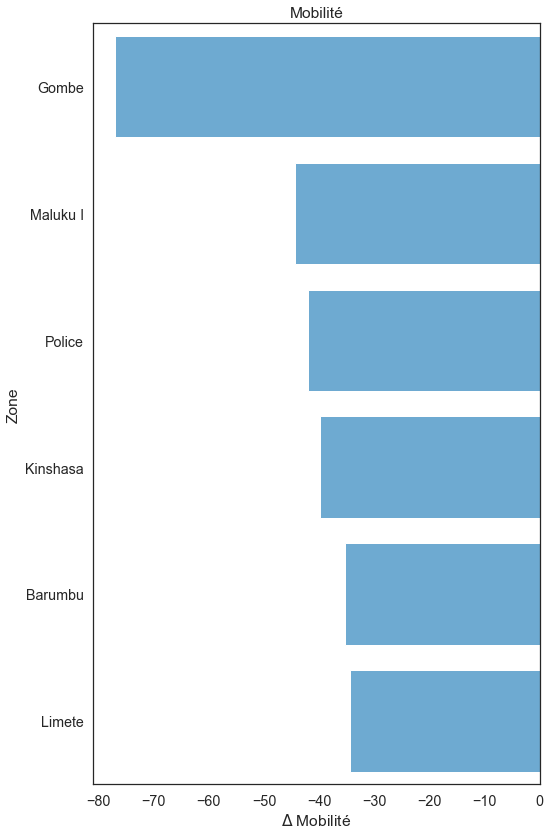

In [455]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="deltaVolume_x_plus_y_x_y", palette=['#5DADE2'],data = df_obs_agg_merge.head(6), orient = 'h')

ax.set(title = 'Mobilité',xlabel = "$\Delta$ Mobilité",ylabel = 'Zone')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

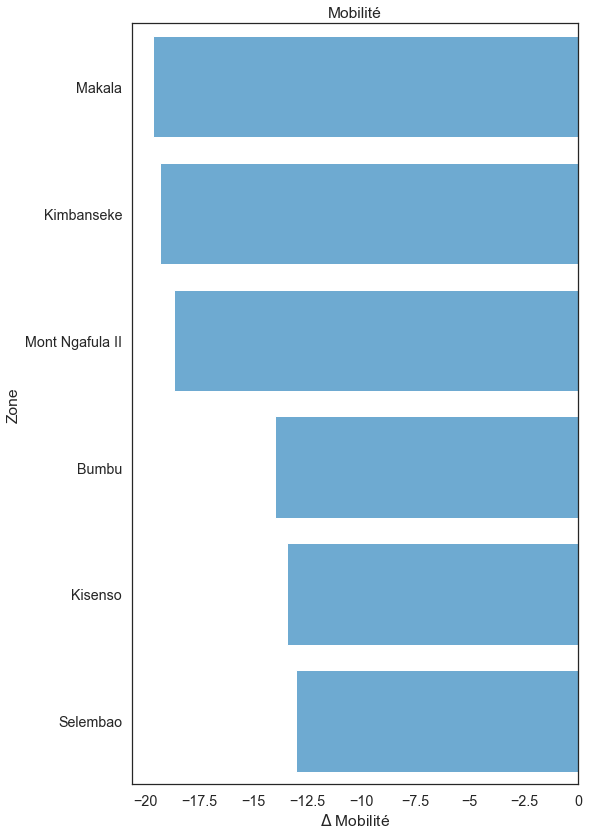

In [456]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="deltaVolume_x_plus_y_x_y", palette=['#5DADE2'],data = df_obs_agg_merge.tail(6), orient = 'h')

ax.set(title = 'Mobilité',xlabel = "$\Delta$ Mobilité",ylabel = 'Zone')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

### Most affected zones

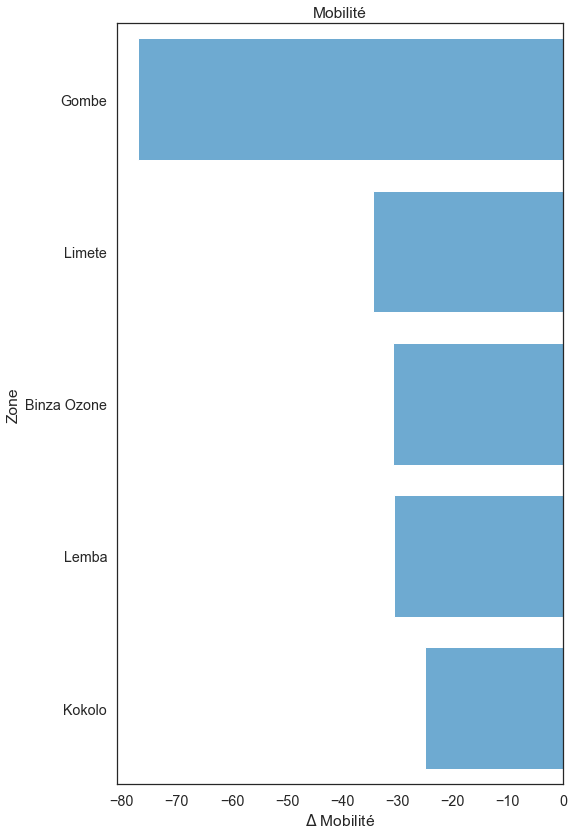

In [457]:
fig = plt.figure(figsize=(8,14))
list_most_aff = ['Gombe','Limete','Kokolo','Binza Ozone','Lemba']
ax = sns.barplot(y="Destination", x="deltaVolume_x_plus_y_x_y", palette=['#5DADE2'],data = df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_most_aff)], orient = 'h')

ax.set(title = 'Mobilité',xlabel = "$\Delta$ Mobilité",ylabel = 'Zone')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [481]:
df_obs_agg_merge[df_obs_agg_merge.Destination.isin(list_most_aff)][['Destination','deltaVolume_x_plus_y_x_y']].to_clipboard(True)

## INBound and OUTBound

In [162]:
#Split Filtered DF to IN and OUT
df_filtered_out = df_g[(df_g['Origin'].isin(list_filtered_zones))]#.drop('Date_day',axis=1)
df_filtered_in = df_g[(df_g['Destination'].isin(list_filtered_zones))]#.drop('Date_day',axis=1)

In [163]:
df_filtered_out

Date    Origin   Destination Observation_Zone  Date_day  Volume
19     2020-01-31   Barumbu   Binza Meteo      ZoneGlobale         4    1958
20     2020-01-31   Barumbu   Binza Ozone      ZoneGlobale         4    1819
21     2020-01-31   Barumbu          Boko      ZoneGlobale         4     382
22     2020-01-31   Barumbu         Bumbu      ZoneGlobale         4    1067
23     2020-01-31   Barumbu         Gombe      ZoneGlobale         4    7491
...           ...       ...           ...              ...       ...     ...
487969 2020-06-29  Selembao   Ngiri-Ngiri      ZoneGlobale         0    8084
487970 2020-06-29  Selembao         Nsele      ZoneGlobale         0    4420
487971 2020-06-29  Selembao  Nsona-Mpangu      ZoneGlobale         0      34
487972 2020-06-29  Selembao        Police      ZoneGlobale         0    2445
487973 2020-06-29  Selembao     Sona-Bata      ZoneGlobale         0    2925

[144069 rows x 6 columns]

In [164]:
df_filtered_in

Date     Origin  Destination Observation_Zone  Date_day  Volume
19     2020-01-31    Barumbu  Binza Meteo      ZoneGlobale         4    1958
20     2020-01-31    Barumbu  Binza Ozone      ZoneGlobale         4    1819
22     2020-01-31    Barumbu        Bumbu      ZoneGlobale         4    1067
23     2020-01-31    Barumbu        Gombe      ZoneGlobale         4    7491
24     2020-01-31    Barumbu     Kalamu I      ZoneGlobale         4    2173
...           ...        ...          ...              ...       ...     ...
488007 2020-06-29  Sona-Bata     Selembao      ZoneGlobale         0    3102
488010 2020-06-29    Tandala        Nsele      ZoneGlobale         0     691
488098 2020-06-29      Vanga   Kimbanseke      ZoneGlobale         0     586
488099 2020-06-29      Vanga     Kingabwa      ZoneGlobale         0     584
488100 2020-06-29      Vanga     Masina I      ZoneGlobale         0     620

[148897 rows x 6 columns]

# Mobility Visualization

## $\Delta$ Mobillity (IN) By Zone

### Daily Movement Flow by Zone de sante

In [459]:
df_temp = df_filtered_in.groupby(by=['Date','Destination'],as_index=0).sum()

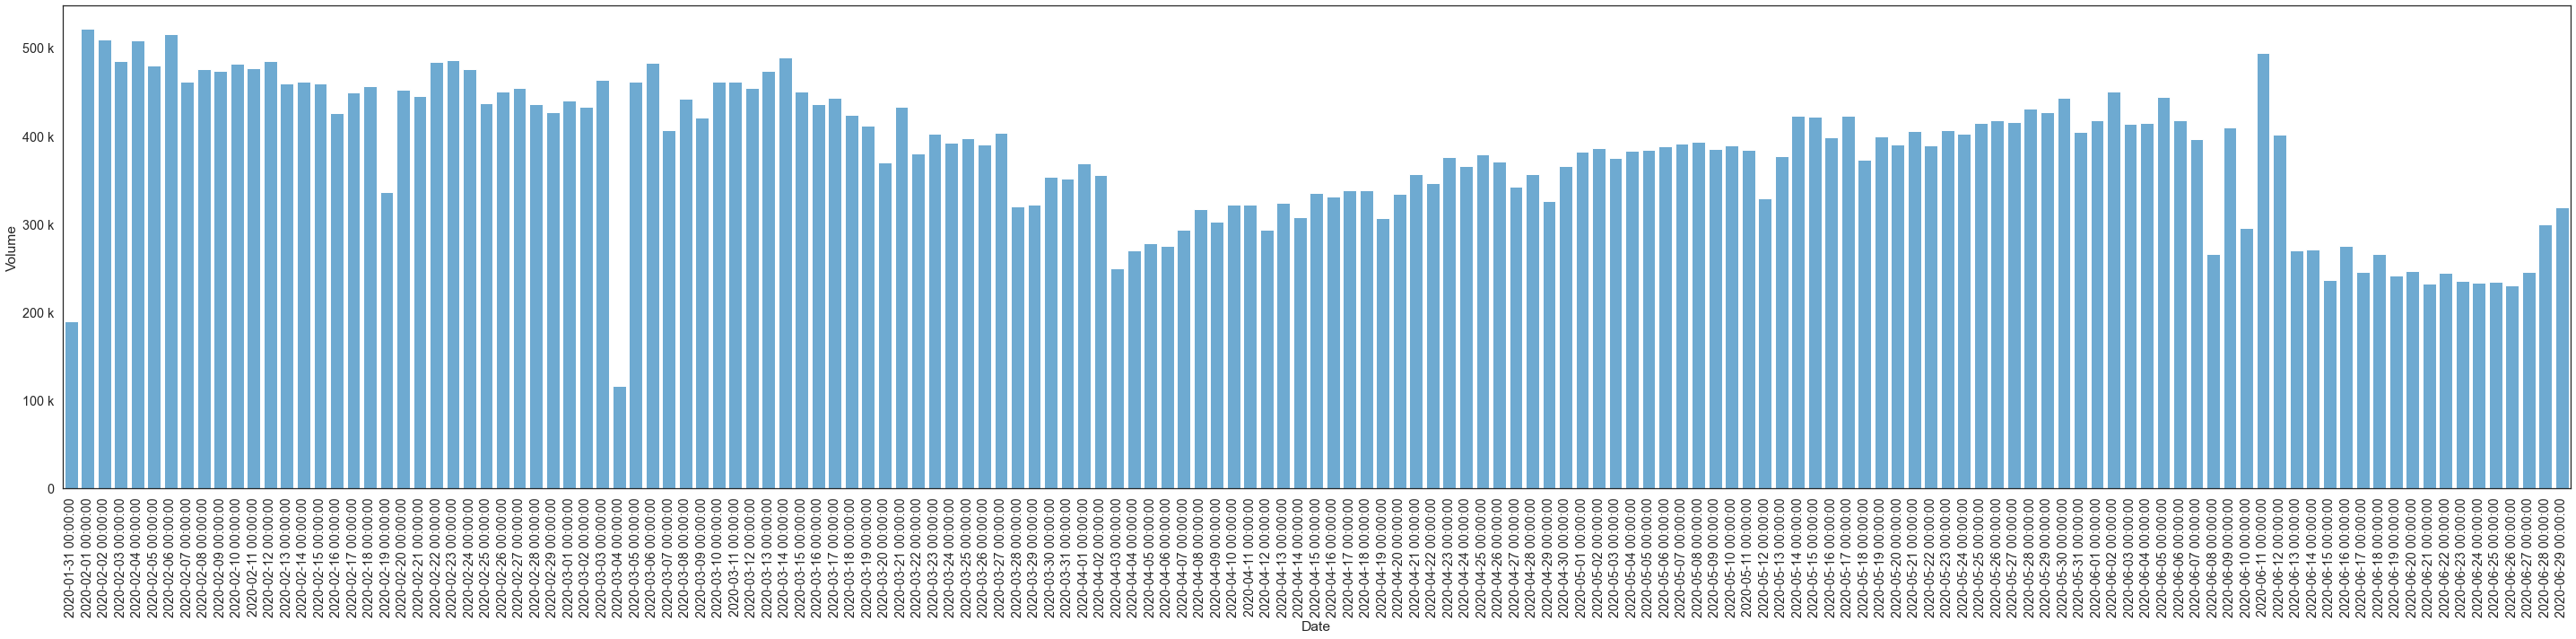

In [460]:
fig = plt.figure(figsize=(40,10))

df_temp_gombe = df_temp[df_temp.Destination == 'Kimbanseke']

ax = sns.barplot(x='Date',y='Volume',data=df_temp_gombe,palette=['#5DADE2'])

# sns.barplot(x='Date',y='Volume',data=df_total_flux[df_total_flux.Date>='2020-06-29'],palette=['#5DADE2'])

# ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.set_xticklabels(labels = df_temp_gombe['Date'], rotation=90)
# ax.

# ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
plt.tight_layout()
plt.show()

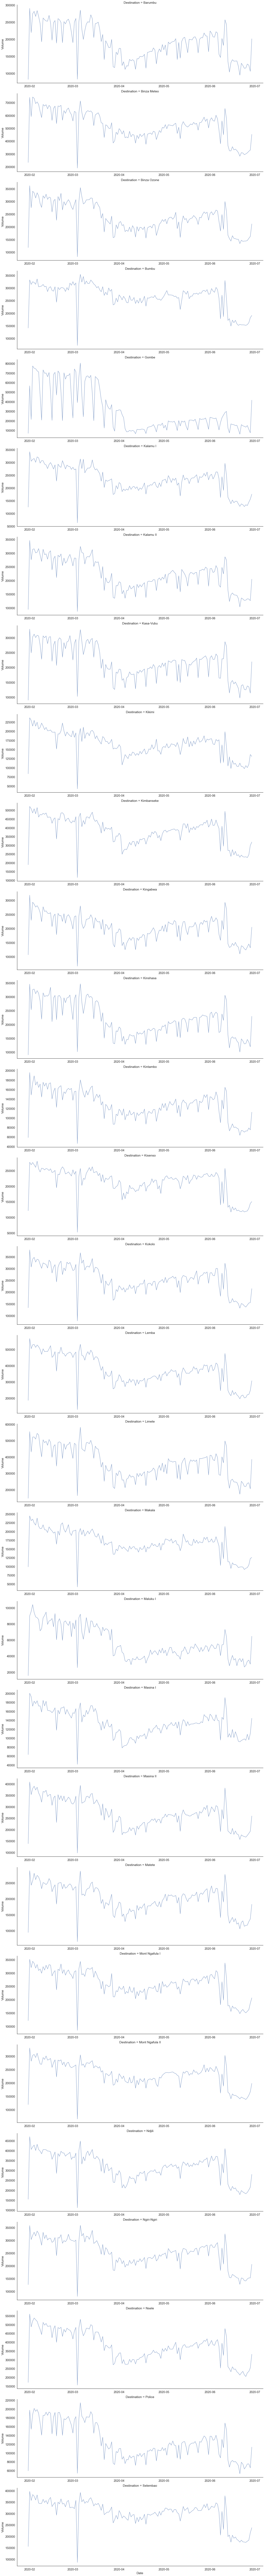

In [461]:
g = sns.FacetGrid(df_temp, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
g.map(plt.plot, "Date", "Volume", alpha=.7)
g.add_legend();

#### Daily Movement to Gombe

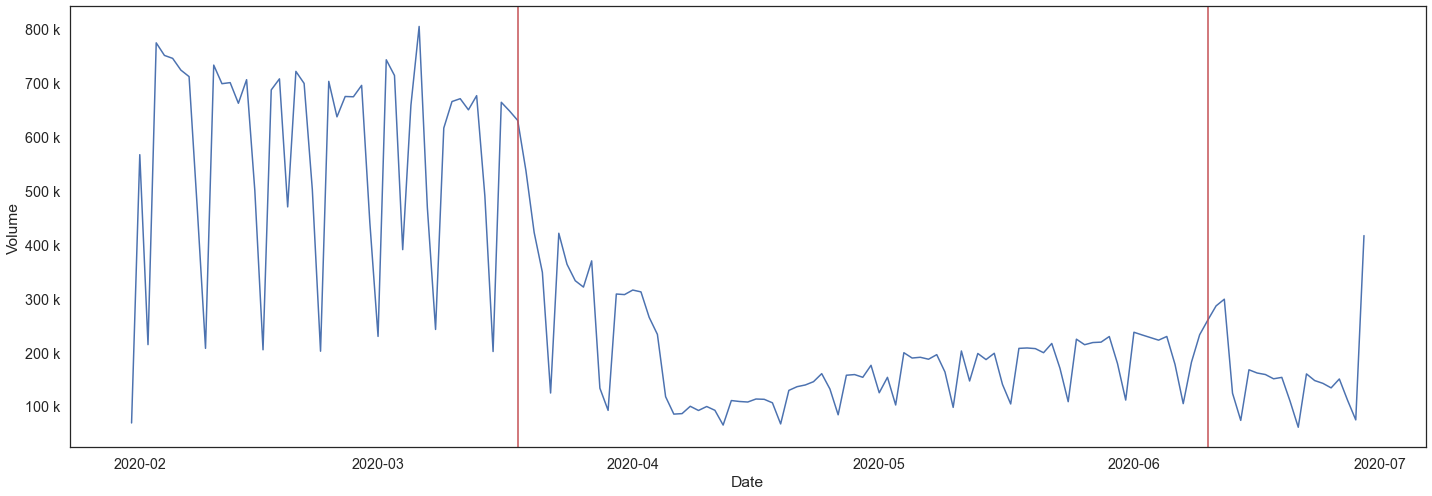

In [464]:
fig = plt.figure(figsize=(20,7))
ax = sns.lineplot(x='Date',y='Volume',data=df_temp[df_temp.Destination == 'Gombe' ])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')

ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()

In [465]:
# mobility with baseline  (the starting date of lockdown in DRC)
ref_start_date = '2020-02-01'
ref_end_date = '2020-03-18'

mask_base = (df_filtered_in['Date'] >= ref_start_date) & (df_filtered_in['Date'] <= ref_end_date)

obs_start_date = '2020-03-19'
obs_end_date = '2020-06-29'

mask_obs = (df_filtered_in['Date'] >= obs_start_date) & (df_filtered_in['Date'] <= obs_end_date)

df_ref = df_filtered_in.loc[mask_base]
df_obs = df_filtered_in.loc[mask_obs]

## Reference period

In [466]:
df_ref_agg = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum()
df_ref_agg[df_ref_agg.Destination == 'Gombe']

Date Destination  Date_day  Volume
4    2020-02-01       Gombe         5  566797
33   2020-02-02       Gombe         6  214095
62   2020-02-03       Gombe         0  774433
91   2020-02-04       Gombe         1  751094
120  2020-02-05       Gombe         2  745626
149  2020-02-06       Gombe         3  723854
178  2020-02-07       Gombe         4  711753
207  2020-02-08       Gombe         5  466079
236  2020-02-09       Gombe         6  207189
265  2020-02-10       Gombe         0  733111
294  2020-02-11       Gombe         1  698602
323  2020-02-12       Gombe         2  700595
352  2020-02-13       Gombe         3  662237
381  2020-02-14       Gombe         4  706040
410  2020-02-15       Gombe         5  500593
439  2020-02-16       Gombe         6  204499
468  2020-02-17       Gombe         0  687048
497  2020-02-18       Gombe         1  707596
526  2020-02-19       Gombe         2  469838
555  2020-02-20       Gombe         3  721476
584  2020-02-21       Gombe         4  699131
613  2020-02-22       Gombe         5  502102
642  2020-02-23       Gombe         6  201865
671  2020-02-24       Gombe         0  702920
700  2020-02-25       Gombe         1  637055
729  2020-02-26       Gombe         2  674834
758  2020-02-27       Gombe         3  674310
787  2020-02-28       Gombe         4  695486
816  2020-02-29       Gombe         5  440906
845  2020-03-01       Gombe         6  229379
874  2020-03-02       Gombe         0  742994
903  2020-03-03       Gombe         1  713868
932  2020-03-04       Gombe         2  390462
961  2020-03-05       Gombe         3  658505
990  2020-03-06       Gombe         4  804901
1019 2020-03-07       Gombe         5  468759
1048 2020-03-08       Gombe         6  242283
1077 2020-03-09       Gombe         0  616228
1106 2020-03-10       Gombe         1  665471
1135 2020-03-11       Gombe         2  670756
1164 2020-03-12       Gombe         3  650062
1193 2020-03-13       Gombe         4  676400
1222 2020-03-14       Gombe         5  490053
1251 2020-03-15       Gombe         6  201302
1280 2020-03-16       Gombe         0  664086
1309 2020-03-17       Gombe         1  648001
1338 2020-03-18       Gombe         2  630316

In [322]:
df_ref_agg = df_ref.groupby(by=['Date','Destination'],as_index=0).sum()
df_ref_agg = df_ref_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_ref_agg.drop('Date_day',inplace=True,axis = 1)
df_ref_agg

Destination  Volume
4             Gombe  664086
1       Binza Meteo  632160
15            Lemba  480673
26            Nsele  479011
16           Limete  477569
9        Kimbanseke  459924
24           Ndjili  388387
28         Selembao  348789
20        Masina II  344594
14           Kokolo  316610
22   Mont Ngafula I  311071
3             Bumbu  310852
25      Ngiri-Ngiri  307198
2       Binza Ozone  306152
11         Kinshasa  296661
7         Kasa-Vubu  288697
6         Kalamu II  286096
5          Kalamu I  285238
23  Mont Ngafula II  275033
0           Barumbu  250729
13          Kisenso  249361
10         Kingabwa  243813
21           Matete  242969
17           Makala  201991
8            Kikimi  197895
27           Police  181575
19         Masina I  162282
12         Kintambo  159795
18         Maluku I   82860

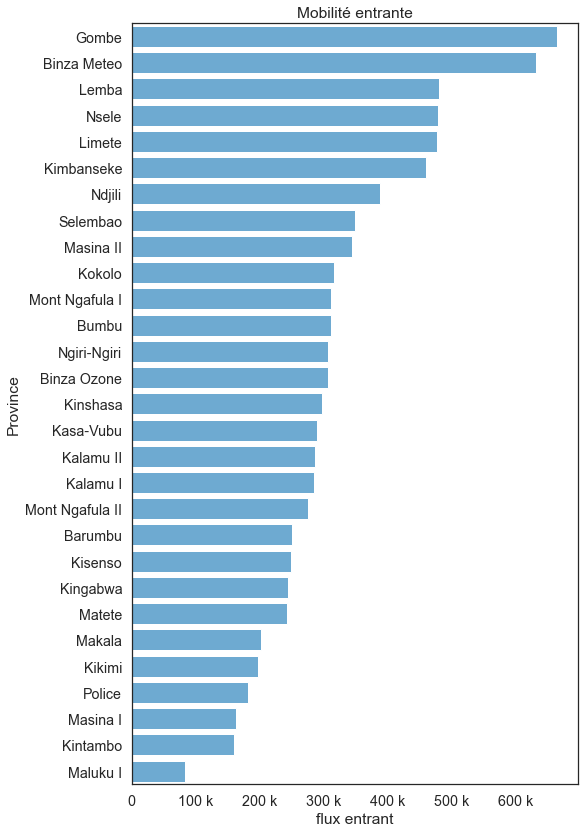

In [323]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_ref_agg.sort_values(by = 'Volume',ascending=0), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

## Observation period

In [324]:
df_obs_agg = df_obs.groupby(by=['Date','Destination'],as_index=0).sum()

df_obs_agg = df_obs_agg.groupby(by='Destination',as_index=0).median().sort_values(by='Volume',ascending=0)
# df_ref_agg.to_clipboard()
df_obs_agg.drop('Date_day',inplace=True,axis = 1)
df_obs_agg

Destination  Volume
1       Binza Meteo  480751
9        Kimbanseke  369712
26            Nsele  340788
15            Lemba  334558
16           Limete  313034
28         Selembao  300645
24           Ndjili  297608
3             Bumbu  262497
20        Masina II  247680
22   Mont Ngafula I  246892
14           Kokolo  235254
25      Ngiri-Ngiri  233407
23  Mont Ngafula II  225261
5          Kalamu I  219225
13          Kisenso  212321
2       Binza Ozone  210009
7         Kasa-Vubu  195976
6         Kalamu II  195513
10         Kingabwa  189895
21           Matete  186788
11         Kinshasa  181251
0           Barumbu  163850
17           Makala  160438
4             Gombe  160201
8            Kikimi  155732
19         Masina I  121737
12         Kintambo  116944
27           Police  105530
18         Maluku I   45035

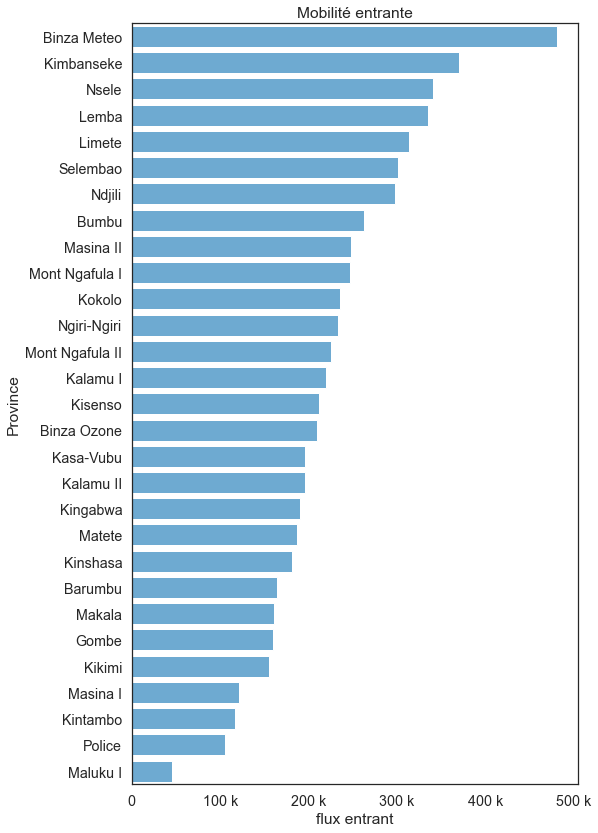

In [325]:
fig = plt.figure(figsize=(8,14))
ax = sns.barplot(y="Destination", x="Volume", palette=['#5DADE2'],data=df_obs_agg.sort_values(by = 'Volume',ascending=0), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = "flux entrant",ylabel = 'Province')
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.show()

In [326]:
zone_gd

Index        C0        C1   Surface     PROVINCE Zone+Peupl  \
0      231  0.357866  0.014489  33881.01   Sud-Ubangi    Tandala   
1      230  0.386971  0.023376    762.28   Sud-Ubangi      Zongo   
2      363  0.482317  0.117910  12679.67  Nord-Ubangi       Bili   
3      233  0.624055  0.264078   1251.62  Nord-Ubangi  Gbadolite   
4      159  0.329985  0.008398  21860.94  Nord-Ubangi       Loko   
..     ...       ...       ...       ...          ...        ...   
310    336  0.360842  0.124134   5558.60        Ituri        Aru   
311    340  0.647995  0.181076   1153.12        Ituri        Adi   
312    338  0.715352  0.264651   3159.19        Ituri    Ariwara   
313    335  0.471356  0.116512  12960.34    Haut-Uele        Aba   
314    346  0.492376  0.096703  19432.93    Haut-Uele      Dungu   

                                              geometry  
0    POLYGON ((18.68941 1.90628, 18.68649 1.90233, ...  
1    POLYGON ((18.67816 3.97665, 18.66909 3.96872, ...  
2    POLYGON ((19.42578 3.89935, 19.41802 3.89628, ...  
3    POLYGON ((20.86461 4.06245, 20.86071 4.06242, ...  
4    POLYGON ((21.35464 3.39852, 21.35367 3.39739, ...  
..                                                 ...  
310  POLYGON ((30.65123 2.14049, 30.65002 2.13740, ...  
311  POLYGON ((30.78577 3.29087, 30.77890 3.29006, ...  
312  POLYGON ((30.45461 2.91338, 30.43551 2.91118, ...  
313  POLYGON ((30.20675 2.59240, 30.18471 2.58432, ...  
314  POLYGON ((28.56956 2.81148, 28.56590 2.80066, ...  

[315 rows x 7 columns]

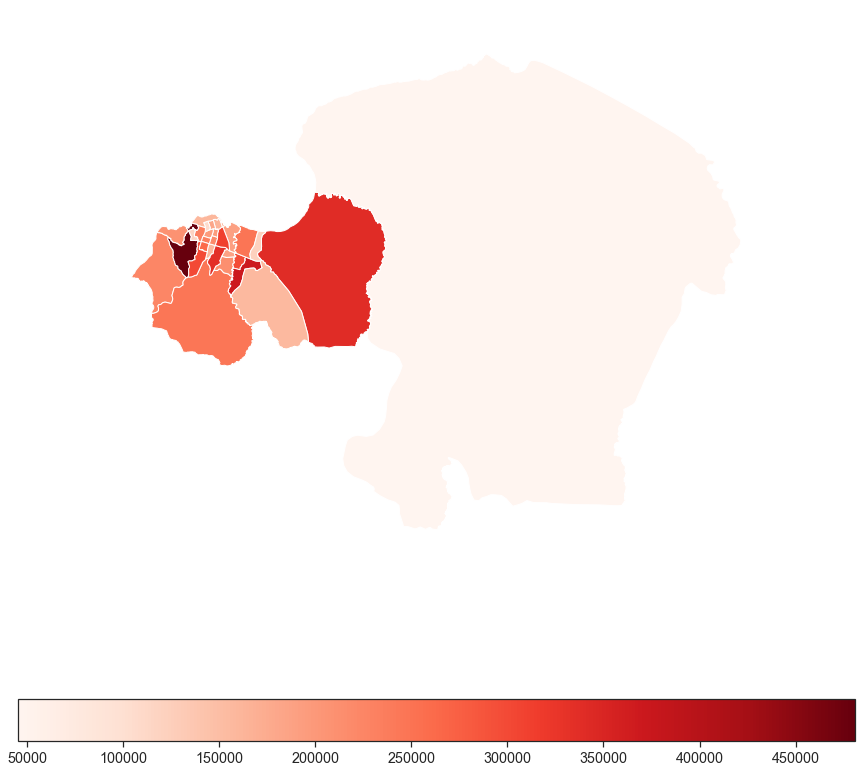

In [327]:
merged_df_agg = zone_filtered_gd.merge(df_obs_agg,left_on = 'Zone+Peupl', right_on = 'Destination' )
gpl.choropleth(
    merged_df_agg, hue=merged_df_agg['Volume'],
    cmap='Reds', figsize=(15, 15),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

## Comparison

In [328]:
df_merged_agg = pd.merge(df_ref_agg,df_obs_agg,left_on='Destination',right_on='Destination')

df_merged_agg['diffVolume'] = (df_merged_agg.Volume_y - df_merged_agg.Volume_x )

df_merged_agg['deltaVolume'] = df_merged_agg['diffVolume']/df_merged_agg.Volume_x*100
df_merged_agg = df_merged_agg.sort_values(by='deltaVolume')
df_merged_agg

Destination  Volume_x  Volume_y  diffVolume  deltaVolume
0             Gombe    664086    160201     -503885   -75.876468
28         Maluku I     82860     45035      -37825   -45.649288
25           Police    181575    105530      -76045   -41.880766
14         Kinshasa    296661    181251     -115410   -38.902990
19          Barumbu    250729    163850      -86879   -34.650559
4            Limete    477569    313034     -164535   -34.452613
15        Kasa-Vubu    288697    195976      -92721   -32.117064
16        Kalamu II    286096    195513      -90583   -31.661750
13      Binza Ozone    306152    210009      -96143   -31.403682
2             Lemba    480673    334558     -146115   -30.398004
3             Nsele    479011    340788     -138223   -28.855914
8         Masina II    344594    247680      -96914   -28.124111
27         Kintambo    159795    116944      -42851   -26.816233
9            Kokolo    316610    235254      -81356   -25.695967
26         Masina I    162282    121737      -40545   -24.984287
12      Ngiri-Ngiri    307198    233407      -73791   -24.020664
1       Binza Meteo    632160    480751     -151409   -23.951057
6            Ndjili    388387    297608      -90779   -23.373336
17         Kalamu I    285238    219225      -66013   -23.143130
22           Matete    242969    186788      -56181   -23.122703
21         Kingabwa    243813    189895      -53918   -22.114489
24           Kikimi    197895    155732      -42163   -21.305743
10   Mont Ngafula I    311071    246892      -64179   -20.631624
23           Makala    201991    160438      -41553   -20.571709
5        Kimbanseke    459924    369712      -90212   -19.614545
18  Mont Ngafula II    275033    225261      -49772   -18.096737
11            Bumbu    310852    262497      -48355   -15.555634
20          Kisenso    249361    212321      -37040   -14.853967
7          Selembao    348789    300645      -48144   -13.803188

In [35]:
# dict_mob = {}
# for dest in list((df.groupby(by = 'Destination').groups.keys())):
#     baseline_value = df_ref['Volume'].loc[df_ref['Destination'] == dest ].sum() 
#      #avoid division by zero
#     if(baseline_value == 0):
#         continue
#     current_value = df_obs['Volume'].loc[df_obs['Destination'] == dest ].sum() 
#     dict_mob[dest] = (current_value - baseline_value)*100/baseline_value
# dict_mob
# df_mobility = pd.DataFrame(dict(provinces = list(dict_mob.keys()),Volume = list(dict_mob.values())))
# df_mobility

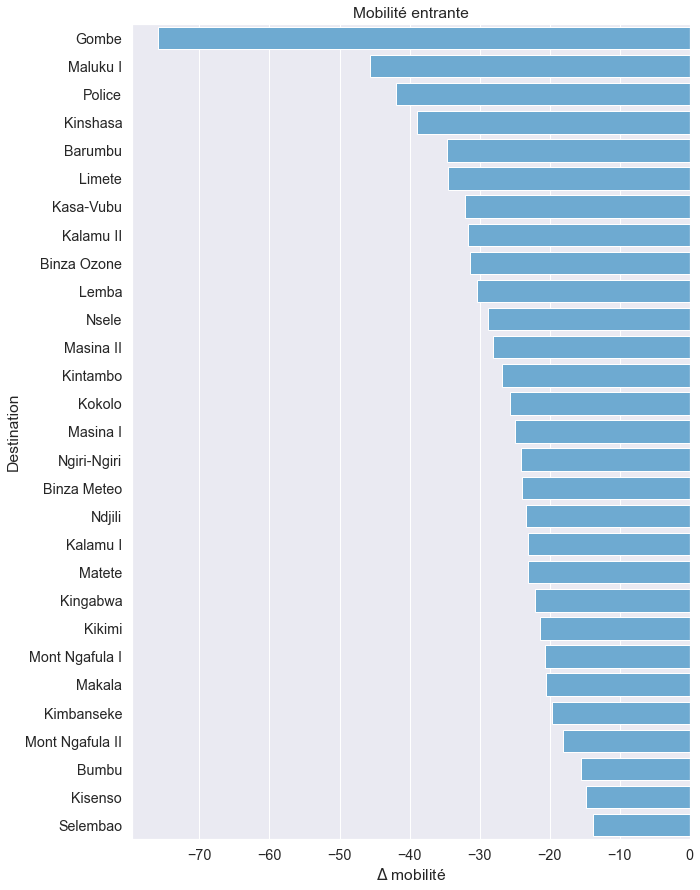

In [233]:
fig = plt.figure(figsize=(10,15))
ax = sns.barplot(y="Destination", x="deltaVolume",palette=['#5DADE2'], data=df_merged_agg.sort_values('deltaVolume'), orient = 'h')
ax.set(title = 'Mobilité entrante',xlabel = '$\Delta$ mobilité')
plt.show()

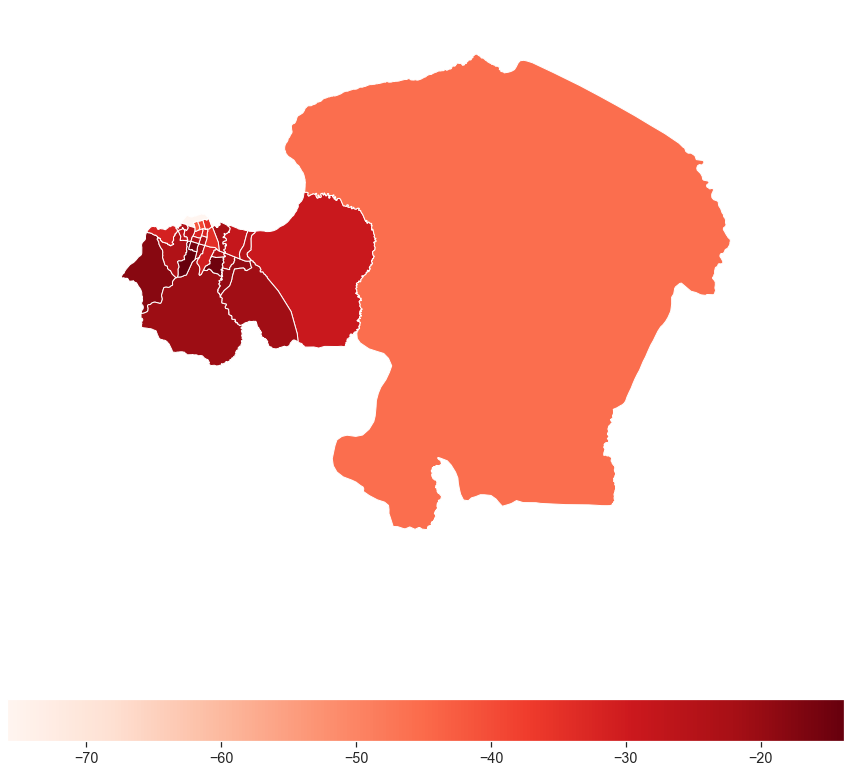

In [234]:
merged_agg = zone_filtered_gd.merge(df_merged_agg,left_on = 'Zone+Peupl', right_on = 'Destination' )
gpl.choropleth(
    merged_agg, hue=merged_agg['deltaVolume'],
    cmap='Reds', figsize=(15, 15),
    legend=True
    , legend_kwargs={'orientation': 'horizontal'}
)
plt.show()

### Mobillity (IN) trends By ZOne de sante

In [237]:
df_ref_agg_date_day = df_ref.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().groupby(by=['Destination','Date_day'],as_index=0).median()
df_ref_agg_date_day[df_ref_agg_date_day.Destination == 'Gombe']

Destination  Date_day    Volume
28       Gombe         0  702920.0
29       Gombe         1  698602.0
30       Gombe         2  670756.0
31       Gombe         3  668273.5
32       Gombe         4  702585.5
33       Gombe         5  490053.0
34       Gombe         6  207189.0

In [238]:
df_obs_agg_date_dest_dd = df_obs.groupby(by=['Date','Destination','Date_day'],as_index=0).sum().sort_values('Date')
df_obs_agg_date_dest_dd[df_obs_agg_date_dest_dd.Destination == 'Gombe']

Date Destination  Date_day  Volume
4    2020-03-19       Gombe         3  536951
33   2020-03-20       Gombe         4  422357
62   2020-03-21       Gombe         5  348335
91   2020-03-22       Gombe         6  124260
120  2020-03-23       Gombe         0  420887
...         ...         ...       ...     ...
2846 2020-06-25       Gombe         3  133810
2875 2020-06-26       Gombe         4  150338
2904 2020-06-27       Gombe         5  110904
2933 2020-06-28       Gombe         6   74357
2962 2020-06-29       Gombe         0  416543

[103 rows x 4 columns]

In [239]:
df_trend = pd.merge(df_obs_agg_date_dest_dd,df_ref_agg_date_day,left_on=['Destination','Date_day'],right_on=['Destination','Date_day']).sort_values(by='Date')
df_trend['deltaV'] = (df_trend['Volume_x'] - df_trend['Volume_y'])/df_trend['Volume_y']*100
# df_trend = df_trend[df_trend.Destination == 'Kinshasa']
df_trend

Date      Destination  Date_day  Volume_x  Volume_y     deltaV
0    2020-03-19          Barumbu         3    228838  255747.5 -10.521901
90   2020-03-19  Mont Ngafula II         3    260783  281106.0  -7.229657
105  2020-03-19   Mont Ngafula I         3    273081  315022.5 -13.313811
120  2020-03-19        Masina II         3    303154  343685.0 -11.793066
270  2020-03-19            Bumbu         3    292865  309628.0  -5.413916
...         ...              ...       ...       ...       ...        ...
2054 2020-06-29            Gombe         0    416543  702920.0 -40.741052
1904 2020-06-29           Police         0    113484  177732.0 -36.148808
1784 2020-06-29         Maluku I         0     64726   76632.0 -15.536590
1769 2020-06-29           Makala         0    125621  201991.0 -37.808615
1949 2020-06-29           Kokolo         0    214994  305479.0 -29.620694

[2987 rows x 6 columns]

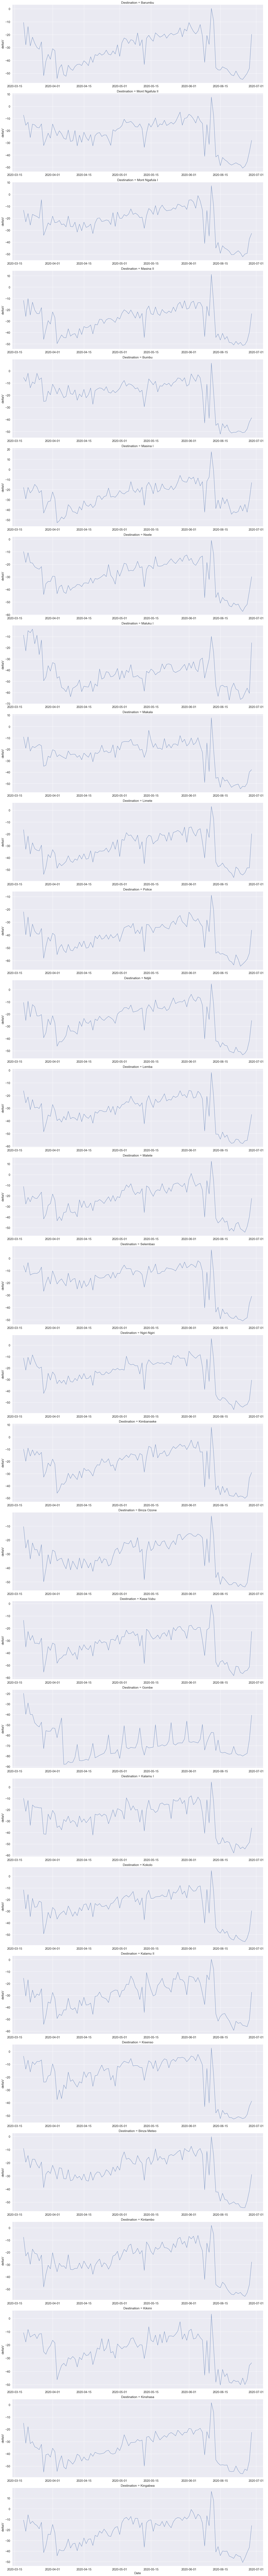

In [240]:
g = sns.FacetGrid(df_trend, row="Destination",aspect=3,height=6,sharey=False,sharex=False)
# g.map(sns.lineplot, x='Date',y='deltaV', alpha=.7)
g.map(plt.plot, "Date", "deltaV", alpha=.7)
# sns.lineplot(x='Date',y='deltaV',data=df_trend)
g.add_legend();

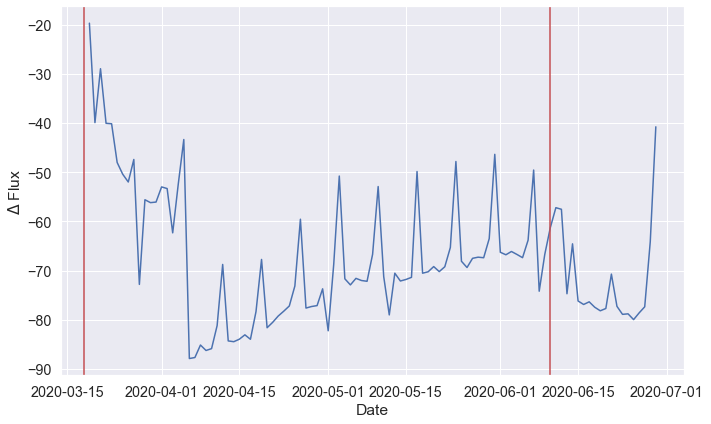

In [205]:
fig = plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Date',y='deltaV',data=df_trend[df_trend.Destination == 'Gombe'])

# ax.set_xticklabels(labels = df_total_flux['Date'], rotation=90)
# ax.
ax.axvline('2020-03-18',ymin = 0, ymax = 1,color = 'r')
ax.axvline('2020-06-10',ymin = 0, ymax = 1,color = 'r')

ax.set(ylabel = '$\Delta$ Flux')
# ax.set_xticklabels(labels=,rotation=45)
# plt.xlim(0)
plt.tight_layout()
plt.show()